<a href="https://colab.research.google.com/github/LeraDoroshenko/ksvd/blob/main/%D0%9B%D0%A0_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')
print(df.head())
print(df.info())
print(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0              2.4          18.7            18.4           27.9         7.9   
1              2.1           6.0            15.0           13.3        15.6   
2             17.2          13.9            23.8            6.8        10.7   
3              8.4           9.7             6.8           26.9         4.6   
4             22.1          10.8            16.4           10.5        22.0   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0          9.6          18.3          13.2         2.5        26.0   
1         13.1          11.0           5.0         7.2        26.0   
2         15.8          19.4           2.7        15.4        21.2   
3         29.1          14.6          19.7        18.0        20.8   
4         23.4           2.6          18.2    

In [ ]:
print(df.isnull().sum())

Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64


In [ ]:
X = df.drop('Cured', axis=1)
y = df['Cured']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
class LogisticRegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionNN(X_train_tensor.shape[1])

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
losses = []

for epoch in range(100):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7785
Epoch 10, Loss: 0.7148
Epoch 20, Loss: 0.6718
Epoch 30, Loss: 0.6405
Epoch 40, Loss: 0.6144
Epoch 50, Loss: 0.5913
Epoch 60, Loss: 0.5705
Epoch 70, Loss: 0.5517
Epoch 80, Loss: 0.5345
Epoch 90, Loss: 0.5190


In [ ]:
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor)
    y_pred = (y_pred_proba >= 0.5).float()

accuracy_nn = accuracy_score(y_test_tensor, y_pred)
print(f"\nТочність (нейромережа): {accuracy_nn:.4f}")
print("\nМатриця плутанини (нейромережа):")
print(confusion_matrix(y_test_tensor, y_pred))
print("\nКласифікаційний звіт (нейромережа):")
print(classification_report(y_test_tensor, y_pred))
print(f"AUC (нейромережа): {roc_auc_score(y_test_tensor, y_pred_proba):.4f}")


Точність (нейромережа): 0.8355

Матриця плутанини (нейромережа):
[[208  23]
 [ 54 183]]

Класифікаційний звіт (нейромережа):
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       231
         1.0       0.89      0.77      0.83       237

    accuracy                           0.84       468
   macro avg       0.84      0.84      0.83       468
weighted avg       0.84      0.84      0.83       468

AUC (нейромережа): 0.9036


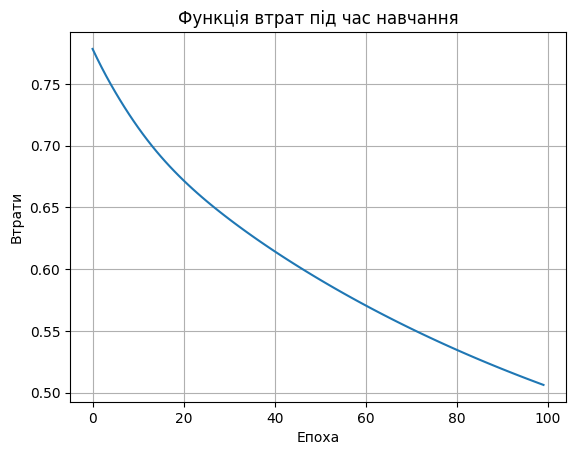

In [ ]:
plt.plot(losses)
plt.title('Функція втрат під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)
y_pred_sk = model_sk.predict(X_test)
y_proba_sk = model_sk.predict_proba(X_test)[:, 1]

In [ ]:
print("\nТочність (Logistic Regression - sklearn):", accuracy_score(y_test, y_pred_sk))
print("\nМатриця плутанини (sklearn):")
print(confusion_matrix(y_test, y_pred_sk))
print("\nКласифікаційний звіт (sklearn):")
print(classification_report(y_test, y_pred_sk))
print(f"AUC (sklearn): {roc_auc_score(y_test, y_proba_sk):.4f}")


Точність (Logistic Regression - sklearn): 0.8931623931623932

Матриця плутанини (sklearn):
[[207  24]
 [ 26 211]]

Класифікаційний звіт (sklearn):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468

AUC (sklearn): 0.9473


Висновок

В даній лабораторній роботі потрібно було спрогнозувати чи вилікується принцеса, на основі заданого датасету.

Було оброблено дані, поділено датасет на тренувальну та тестову вибірки, маштабовано ознаки. Після було побудовано логістичну регресію за допомогою нейронної мережі.

В результаті виконання завдань було отримано точність ~83.6% та AUC 0.90, що свідчить про доволі високу якість моделі.

Для порівняння було побудовано класичну модель логістичної регресії, яка показала точність 89.32%, що є кращим результатом.